### HW3-Q3

In [3]:
import numpy as np
import h5py
import matplotlib.pyplot as plt 

In [4]:
with h5py.File('mnist_network_params.hdf5','r') as f:
    W1=np.array(f['W1'])
    W2=np.array(f['W2'])
    W3=np.array(f['W3'])
    b1=np.array(f['b1'])
    b2=np.array(f['b2'])
    b3=np.array(f['b3'])

assert W1.shape==(200, 784),"Error: W1's size incorrect"
assert b1.shape==(200,),"Error: b1's size incorrect"
assert W2.shape==(100, 200),"Error: W2's size incorrect"
assert b2.shape==(100,),"Error: b2's size incorrect"
assert W3.shape==(10, 100),"Error: W3's size incorrect"
assert b3.shape==(10,),"Error: b3's size incorrect"

In [5]:
with h5py.File('mnist_testdata.hdf5','r') as f:
    xdata=np.array(f['xdata'])
    ydata=np.array(f['ydata'])

assert xdata.shape==(10000, 784),"Error: xdata's size incorrect"
assert ydata.shape==(10000, 10),"Error: ydata's size incorrect"

In [6]:
def ReLU(x):
    return np.maximum(np.zeros_like(x),x)

def Softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def MLP(x):
    z1=np.dot(W1,x)+b1
    a1=ReLU(z1)
    z2=np.dot(W2,a1)+b2
    a2=ReLU(z2)
    z3=np.dot(W3,a2)+b3
    result=Softmax(z3)
    return result

In [7]:
result=np.zeros_like(ydata)
pre_label=np.zeros(len(ydata))
true_label=np.zeros_like(pre_label)
data=[]
for i in range(len(xdata)):
    result[i]=MLP(xdata[i])
    pre_label[i]=np.argmax(result[i])
    true_label[i]=np.argmax(ydata[i])
    data.append({
        "index": i,
        "activations": result[i].tolist(),
        "classification": pre_label[i]
    })

In [8]:
import json
with open("result.json","w") as f:
    f.write(json.dumps(data))

In [10]:
classified=[]
misclassified=[]
for i in range(len(true_label)):
    if pre_label[i]==true_label[i]:
        classified.append(i)
    else:
        misclassified.append(i)
print("The number of correctly classified images:",len(classified))

The number of correctly classified images: 9790


Picture 0 is classified correctly:
The label is: 7


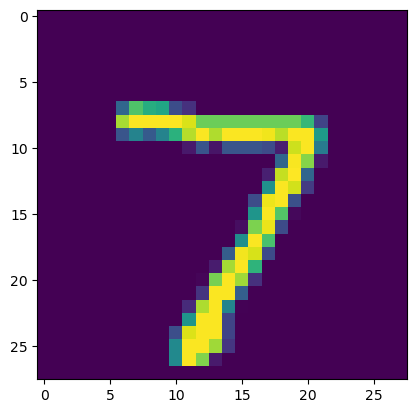

Picture 1 is classified correctly:
The label is: 2


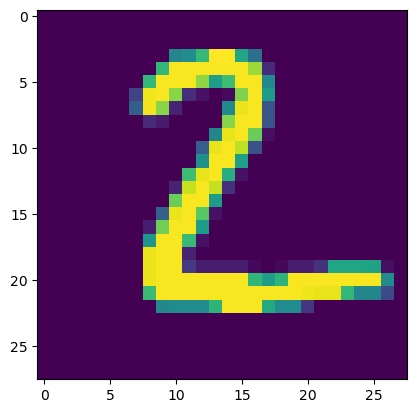

Picture 2 is classified correctly:
The label is: 1


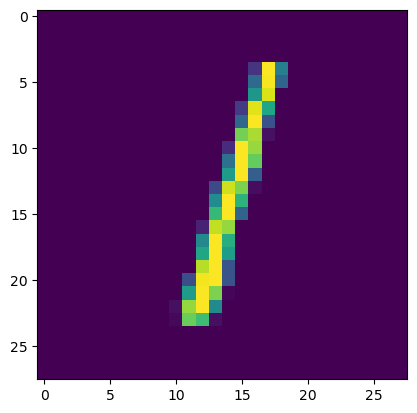

In [12]:
#several it classified correctly
for i in range(3):
    plt.figure()
    idx=classified[i]
    print("Picture",idx,"is classified correctly:")
    print("The label is:",int(true_label[idx]))
    plt.imshow(xdata[idx].reshape(28,28))
    plt.show()

Picture 8 is classified incorrectly:
The true label is: 5
The predicted label is: 6


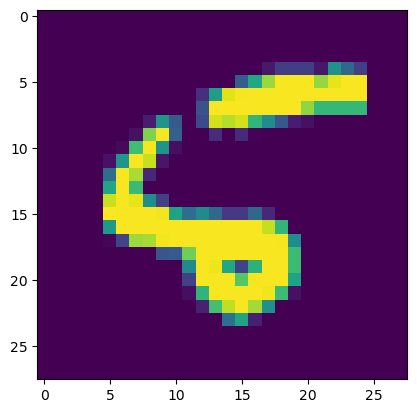

Picture 115 is classified incorrectly:
The true label is: 4
The predicted label is: 9


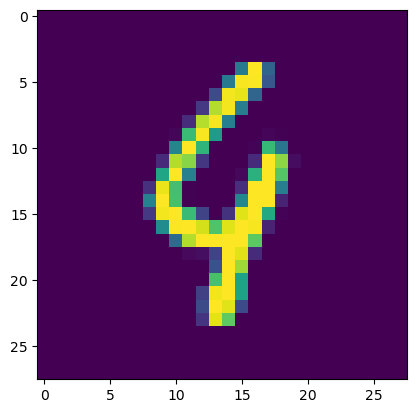

Picture 247 is classified incorrectly:
The true label is: 4
The predicted label is: 6


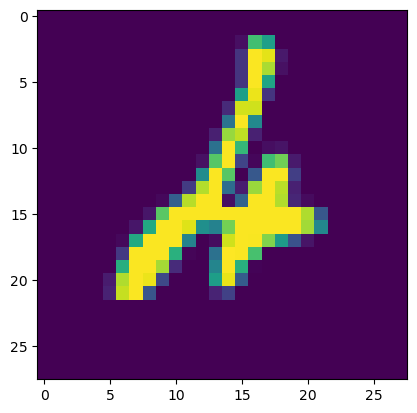

Picture 321 is classified incorrectly:
The true label is: 2
The predicted label is: 7


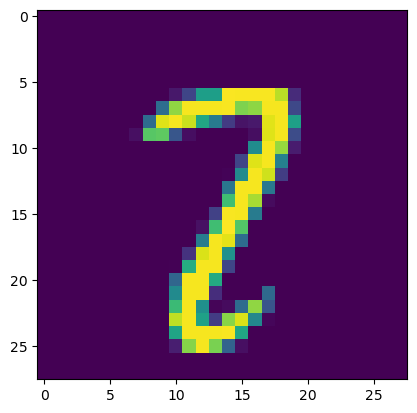

Picture 340 is classified incorrectly:
The true label is: 5
The predicted label is: 3


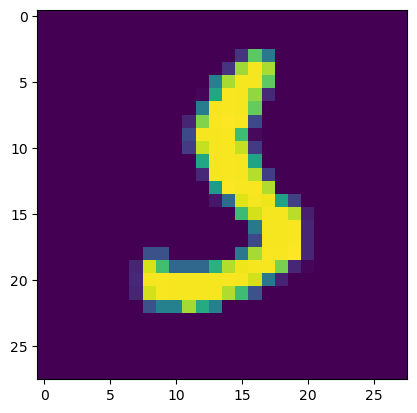

In [15]:
#several it classified incorrectly
for i in range(5):
    plt.figure()
    idx=misclassified[i]
    print("Picture",idx,"is classified incorrectly:")
    print("The true label is:",int(true_label[idx]))
    print("The predicted label is:",int(pre_label[idx]))
    plt.imshow(xdata[idx].reshape(28,28))
    plt.show()

### Comment
I think the incorrect cases are also challenging for me to identified. For instance, in picture 115, the digit '4' is misclassified as '9'. This is understandable, because two digits share similar stuctures, and when they are not written clearly, it becomes easy to confuse them.